# Experimento para grafo d-regular con distintos p variando el tamaño

In [361]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
from __future__ import division
from decimal import Decimal

def generar_entradas(nombre_archivo_entrada, cantidad_maxima_de_paginas, probabilidad_de_link):
    grafo = generar_grafo_aleatorio(cantidad_maxima_de_paginas, probabilidad_de_link)
    
    for i in range(2, cantidad_maxima_de_paginas):
        cantidad_maxima_de_paginas, probabilidad_de_link
        subgrafo = grafo[0:i, 0:i]
        f =open(nombre_archivo_entrada + str(i).zfill(5), 'w')
        salida = generar_salida_matriz(subgrafo);
        f.write(salida.encode('utf8'))
        f.close()

    
def generar_grafo_ciclico(cantidadNodos):
    grafo = np.zeros((cantidadNodos, cantidadNodos))  # Matriz de ceros
    grafo[cantidadNodos-1][0] = 1
    for i in range(1, cantidadNodos):
        grafo[i-1][i] = 1
    return grafo

# transforma la matriz al formato de entrada pedido por la catedra
def generar_salida_matriz(matriz):
    ret = ''
    cant_paginas = matriz.shape[0]
    total_links = 0
    for i in range(0, cant_paginas):
        for j in range(0, cant_paginas):
            if (matriz[i][j]!=0):
                total_links += 1;
                ret = ret + str(i) + ' ' + str(j) + '\n'
    ret = str(cant_paginas) + '\n' + str(total_links) + '\n' + ret
    return ret

def escribir_matriz_en_archivo(matriz, nombre_archivo):
    salida = generar_salida_matriz(matriz)
    f =open(nombre_archivo, 'w')
    f.write(salida.encode('utf8'))
    f.close()    


path_dir_de_trabajo = '/home/christian/'
nombre_page_rank = 'tp1'

def ejecutar(nombre_archivo, probabilidad_de_no_salto):
    #print(nombre_page_rank)
    #print(path_dir_de_trabajo + nombre_page_rank + ' ' + nombre_archivo + ' ' + str(probabilidad_de_no_salto))
    os.popen(path_dir_de_trabajo + nombre_page_rank + ' ' + nombre_archivo + ' ' + str(probabilidad_de_no_salto))

def leer(nombre_archivo):
    return pd.read_csv(nombre_archivo)


def porcentaje_de_valores_repetidos(cantidad_de_nodos):
    rango = np.arange(0.0, 1.1, 0.1)
    datos = pd.DataFrame()
    
    path = 'grafo_circuito_simple/'
    path_nombre_archivo = path_dir_de_trabajo + path + 'entrada'
    os.popen('mkdir ' + path_dir_de_trabajo + path)
    os.popen('rm ' + path_dir_de_trabajo + path + '*')
    
    for i in rango:
        sufijo = str(i).zfill(8)
        escribir_matriz_en_archivo(generar_grafo_ciclico(cantidad_de_nodos), path_nombre_archivo + sufijo)

    for i in rango:
        sufijo = str(i).zfill(8)
        print('procesando ' + path_nombre_archivo + sufijo + ' con probabilidad' + str(i) + '...\n')
        ejecutar(path_nombre_archivo + sufijo, i)
        
    for i in rango:        
        sufijo = str(i).zfill(8)
        print(path_nombre_archivo + sufijo + '.out')
        datos_1 = leer(path_nombre_archivo + sufijo + '.out')
        datos = pd.concat([datos, datos_1], axis=1)

    porcentajes = []
    
    for columna in datos.columns:
        porcentajes.append(datos[columna].value_counts().replace(1, 0).max() / datos[columna].size * 100)
    datos_porcentaje = pd.DataFrame(porcentajes)
    return(datos_porcentaje)
    #datos_porcentaje.head()
    
def serie_de_porcentajes(cantidad_maxima_de_nodos, paso):
    df_porcentaje = pd.DataFrame()
    etiquetas_columnas = []
    for i in range (paso, cantidad_maxima_de_nodos, paso):
        etiquetas_columnas.append(i);
        df_porcentaje = pd.concat([df_porcentaje, porcentaje_de_valores_repetidos(i)], axis=1)
    
    df_porcentaje.columns = etiquetas_columnas
    df_porcentaje.to_csv(path_dir_de_trabajo + 'mediciones_circuito_simple')

#df = pd.read_csv(path_dir_de_trabajo + 'prueba')
#df.head(11)

def graficar(mediciones, titulo, tipo_de_grafico):
    plt.gcf().clear()
    plt.subplots_adjust(hspace=0.2)
    #plt.title(titulo)
    mi_plot = mediciones.T.plot(kind='bar')
    fig1 = plt.gcf()
    fig1.subplots_adjust(wspace=0.6, top=0.8, right=0.9, left=0.15, bottom=0.15)
    mi_plot.set_ylabel("porcentaje de cantidad maxima")
    mi_plot.set_xlabel("cantidad de nodos")
    
    p = ['p=0', 'p=0,3', 'p=0.7', 'p=1']
    L=plt.legend(bbox_to_anchor=(0.5, 0.95), ncol=4, loc='upper center', bbox_transform=plt.gcf().transFigure)

    for i in range(0, len(p)):
        L.get_texts()[i].set_text(p[i])
    
    plt.grid(False)
    plt.show()
    plt.draw()

    fig1.savefig(path_dir_de_trabajo + "mediciones.png", dpi=100)

serie_de_porcentajes(501, 100)        
graficar(df, 'titulo', 'bar')


procesando /home/christian/grafo_circuito_simple/entrada000000.0 con probabilidad0.0...

procesando /home/christian/grafo_circuito_simple/entrada000000.1 con probabilidad0.1...

procesando /home/christian/grafo_circuito_simple/entrada000000.2 con probabilidad0.2...

procesando /home/christian/grafo_circuito_simple/entrada000000.3 con probabilidad0.3...

procesando /home/christian/grafo_circuito_simple/entrada000000.4 con probabilidad0.4...

procesando /home/christian/grafo_circuito_simple/entrada000000.5 con probabilidad0.5...

procesando /home/christian/grafo_circuito_simple/entrada000000.6 con probabilidad0.6...

procesando /home/christian/grafo_circuito_simple/entrada000000.7 con probabilidad0.7...

procesando /home/christian/grafo_circuito_simple/entrada000000.8 con probabilidad0.8...

procesando /home/christian/grafo_circuito_simple/entrada000000.9 con probabilidad0.9...

procesando /home/christian/grafo_circuito_simple/entrada000001.0 con probabilidad1.0...

/home/christian/grafo

KeyboardInterrupt: 

# Experimento para grafo estrella con p=0

In [306]:
# transforma la matriz al formato de entrada pedido por la catedra
def generar_salida_matriz(matriz):
    ret = ''
    cant_paginas = matriz.shape[0]
    total_links = 0
    for i in range(0, cant_paginas):
        for j in range(0, cant_paginas):
            if (matriz[i][j]!=0):
                total_links += 1;
                ret = ret + str(i) + ' ' + str(j) + '\n'
    ret = str(cant_paginas) + '\n' + str(total_links) + '\n' + ret
    return ret

def escribir_matriz_en_archivo(matriz, nombre_archivo):
    salida = generar_salida_matriz(matriz)
    f =open(nombre_archivo, 'w')
    f.write(salida.encode('utf8'))
    f.close()
    

def grafo_estrella(cantidadNodos):
    grafo = np.zeros((cantidadNodos, cantidadNodos))  # Matriz de ceros
    for i in range(0, cantidadNodos-1):
        grafo[i][cantidadNodos-1] = 1
    return grafo

def ejecutar(nombre_archivo, probabilidad_de_no_salto):
    os.popen(path_dir_de_trabajo + nombre_page_rank + ' ' + path_dir_de_trabajo + nombre_archivo + ' ' + str(probabilidad_de_no_salto))

def leer(nombre_archivo):
    #f =open(nombre_archivo_entrada + nombre_archivo, 'r')
    return pd.read_csv(path_dir_de_trabajo + nombre_archivo)


def generar_entrada(generador_grafo, cantidad_nodos, nombre_archivo):
    grafo = generador_grafo(cantidad_nodos)
    escribir_matriz_en_archivo(grafo, path_dir_de_trabajo + nombre_archivo)

    
generar_entrada(grafo_estrella, 5, 'grafoEstrella')
ejecutar('grafoEstrella', 0.0)



# Experimentacion para camino simple y grafos aleatorios de densidad 20%

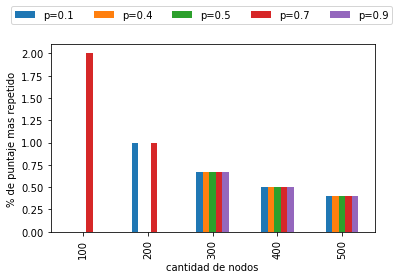

In [360]:
from __future__ import division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
from decimal import Decimal


##-------------Generador de grafos con cierta densidad---------------------------##
def getArcoAleatorio(grafo):
    i = random.randint(1, len(grafo))
    j = random.randint(1, len(grafo))
    
    while (grafo[i-1][j-1]>0):
        i = random.randint(1, len(grafo))
        j = random.randint(1, len(grafo))
        #print(grafo[i-1][j-1]==1.0)
    return [i-1, j-1]

   
def generar_grafo_con_cantidad_de_nodos(densidad, cantidad_de_nodos):
    grafo = np.zeros((cantidad_de_nodos, cantidad_de_nodos))  # Matriz de ceros
    cantidad_maxima_de_arcos = cantidad_de_nodos * (cantidad_de_nodos - 1)
    
    cantidad_de_arcos = 0
    promedio_de_arcos = 0
    
    while (promedio_de_arcos < densidad):
        arco = getArcoAleatorio(grafo)
        grafo[arco[0]][arco[1]] = 1
        cantidad_de_arcos = cantidad_de_arcos + 1
        promedio_de_arcos = (cantidad_de_arcos / cantidad_maxima_de_arcos)*100
        #print(promedio_de_arcos)
    return grafo    
    
def generar_grafo_con_densidad(cantidad_de_nodos, densidad):
    grafo = np.zeros((cantidad_de_nodos, cantidad_de_nodos))  # Matriz de ceros
    cantidad_maxima_de_arcos = cantidad_de_nodos ** 2
    
    cantidad_de_arcos = 0
    promedio_de_arcos = 0
    
    while (promedio_de_arcos < densidad):
        arco = getArcoAleatorio(grafo)
        grafo[arco[0]][arco[1]] = 1
        cantidad_de_arcos = cantidad_de_arcos + 1
        promedio_de_arcos = (cantidad_de_arcos / cantidad_maxima_de_arcos)*100
        #print(promedio_de_arcos)
    return grafo
##-------------Generador de grafos con cierta densidad---------------------------##



def generar_entradas(nombre_archivo_entrada, cantidad_maxima_de_paginas, probabilidad_de_link):
    grafo = generar_grafo_aleatorio(cantidad_maxima_de_paginas, probabilidad_de_link)
    
    for i in range(2, cantidad_maxima_de_paginas):
        cantidad_maxima_de_paginas, probabilidad_de_link
        subgrafo = grafo[0:i, 0:i]
        f =open(nombre_archivo_entrada + str(i).zfill(5), 'w')
        salida = generar_salida_matriz(subgrafo);
        f.write(salida.encode('utf8'))
        f.close()

def generar_circuito_simple(cantidadNodos):
    grafo = np.zeros((cantidadNodos, cantidadNodos))  # Matriz de ceros
    grafo[cantidadNodos-1][0] = 1
    for i in range(1, cantidadNodos):
        grafo[i-1][i] = 1
    return grafo

    
def generar_camino_simple(cantidadNodos):
    grafo = np.zeros((cantidadNodos, cantidadNodos))  # Matriz de ceros
    for i in range(0, cantidadNodos):
        grafo[i][i] = 1
    return grafo

# transforma la matriz al formato de entrada pedido por la catedra
def generar_salida_matriz(matriz):
    ret = ''
    cant_paginas = matriz.shape[0]
    total_links = 0
    for i in range(0, cant_paginas):
        for j in range(0, cant_paginas):
            if (matriz[i][j]!=0):
                total_links += 1;
                ret = ret + str(i) + ' ' + str(j) + '\n'
    ret = str(cant_paginas) + '\n' + str(total_links) + '\n' + ret
    return ret

def escribir_matriz_en_archivo(matriz, nombre_archivo):
    salida = generar_salida_matriz(matriz)
    f =open(nombre_archivo, 'w')
    f.write(salida.encode('utf8'))
    f.close()    


path_dir_de_trabajo = '/home/christian/'
nombre_page_rank = 'tp1'

def ejecutar(nombre_archivo, probabilidad_de_no_salto):
    #print(nombre_page_rank)
    #print(path_dir_de_trabajo + nombre_page_rank + ' ' + nombre_archivo + ' ' + str(probabilidad_de_no_salto))
    os.popen(path_dir_de_trabajo + nombre_page_rank + ' ' + nombre_archivo + ' ' + str(probabilidad_de_no_salto))

def leer(nombre_archivo):
    return pd.read_csv(nombre_archivo)


def porcentaje_de_valores_repetidos(generador_de_grafos, cantidad_de_nodos, path_nombre_archivo):
    rango = np.arange(0.0, 1.1, 0.1)
    datos = pd.DataFrame()
       
    print(rango)
    for i in rango:
        sufijo = str(i).zfill(8)
        escribir_matriz_en_archivo(generador_de_grafos(cantidad_de_nodos), path_nombre_archivo + str(cantidad_de_nodos) + sufijo)

    for i in rango:
        sufijo = str(i).zfill(8)
        print('procesando ' + path_nombre_archivo + str(cantidad_de_nodos) + sufijo + ' con probabilidad' + str(i) + '...\n')
        ejecutar(path_nombre_archivo + str(cantidad_de_nodos) + sufijo, i)
        
    for i in rango:        
        sufijo = str(i).zfill(8)
        print(path_nombre_archivo + sufijo + '.out')
        datos_1 = leer(path_nombre_archivo + str(cantidad_de_nodos) + sufijo + '.out')
        datos = pd.concat([datos, datos_1], axis=1)

    porcentajes = []
    
    for columna in datos.columns:
        porcentajes.append(datos[columna].value_counts().replace(1, 0).max() / datos[columna].size * 100)
    datos_porcentaje = pd.DataFrame(porcentajes)
    return(datos_porcentaje)
    #datos_porcentaje.head()

def porcentaje_de_valores_repetidos_grafo_aleatorio(generador_de_grafos, cantidad_de_nodos, densidad, path_nombre_archivo):
    rango = np.arange(0.0, 1.1, 0.1)
    datos = pd.DataFrame()
       
    print(rango)
    for i in rango:
        sufijo = str(i).zfill(8)
        escribir_matriz_en_archivo(generador_de_grafos(cantidad_de_nodos, densidad), path_nombre_archivo + str(cantidad_de_nodos) + sufijo)

    for i in rango:
        sufijo = str(i).zfill(8)
        print('procesando ' + path_nombre_archivo + str(cantidad_de_nodos) + sufijo + ' con probabilidad' + str(i) + '...\n')
        ejecutar(path_nombre_archivo + str(cantidad_de_nodos) + sufijo, i)
        
    for i in rango:        
        sufijo = str(i).zfill(8)
        print(path_nombre_archivo + sufijo + '.out')
        datos_1 = leer(path_nombre_archivo + str(cantidad_de_nodos) + sufijo + '.out')
        datos = pd.concat([datos, datos_1], axis=1)

    porcentajes = []
    
    for columna in datos.columns:
        porcentajes.append(datos[columna].value_counts().replace(1, 0).max() / datos[columna].size * 100)
    datos_porcentaje = pd.DataFrame(porcentajes)
    return(datos_porcentaje)

    
def serie_de_porcentajes(generador_de_grafos, cantidad_maxima_de_nodos, paso, nombre_archivo, nombre_experimento):
    path = nombre_experimento
    path_nombre_archivo = path_dir_de_trabajo + path + 'entrada'
    print(os.path.isdir(path_dir_de_trabajo + path))
    os.popen('mkdir ' + path_dir_de_trabajo + path)
    os.popen('rm ' + path_dir_de_trabajo + path + '*')
    df_porcentaje = pd.DataFrame()
    etiquetas_columnas = []
    for i in range (paso, cantidad_maxima_de_nodos, paso):
        etiquetas_columnas.append(i);
        df_porcentaje = pd.concat([df_porcentaje, porcentaje_de_valores_repetidos(generador_de_grafos, i, path_nombre_archivo)], axis=1)
    
    df_porcentaje.columns = etiquetas_columnas
    df_porcentaje.to_csv(path_dir_de_trabajo + nombre_archivo)

#df = pd.read_csv(path_dir_de_trabajo + 'prueba')
#df.head(11)

def graficar(nombre_archivo, titulo, tipo_de_grafico):
    mediciones = pd.read_csv(path_dir_de_trabajo + nombre_archivo)
    plt.gcf().clear()
    plt.subplots_adjust(hspace=0.2)
    #plt.title(titulo)
    mi_plot = mediciones.T.plot(kind='bar')
    fig1 = plt.gcf()
    fig1.subplots_adjust(wspace=0.6, top=0.8, right=0.9, left=0.15, bottom=0.15)
    mi_plot.set_ylabel("% de puntaje mas repetido")
    mi_plot.set_xlabel("cantidad de nodos")
    
    p = ['p=0', 'p=0,3', 'p=0.7', 'p=1']
    L=plt.legend(bbox_to_anchor=(0.5, 0.95), ncol=4, loc='upper center', bbox_transform=plt.gcf().transFigure)

    for i in range(0, len(p)):
        L.get_texts()[i].set_text(p[i])
    
    plt.grid(False)
    plt.show()
    plt.draw()

    fig1.savefig(path_dir_de_trabajo + "mediciones.png", dpi=100)
    
def graficar_aleatorio(nombre_archivo, titulo, tipo_de_grafico):
    mediciones = pd.read_csv(path_dir_de_trabajo + nombre_archivo)
    plt.gcf().clear()
    plt.subplots_adjust(hspace=0.2)
    #plt.title(titulo)
    mi_plot = mediciones.T.plot(kind='bar')
    fig1 = plt.gcf()
    fig1.subplots_adjust(wspace=0.6, top=0.8, right=0.9, left=0.15, bottom=0.15)
    mi_plot.set_ylabel("% de puntaje mas repetido")
    mi_plot.set_xlabel("cantidad de nodos")
    
    p = ['p=0.1', 'p=0.4', 'p=0.5', 'p=0.7', 'p=0.9']
    L=plt.legend(bbox_to_anchor=(0.5, 0.95), ncol=5, loc='upper center', bbox_transform=plt.gcf().transFigure)

    for i in range(0, len(p)):
        L.get_texts()[i].set_text(p[i])
    
    plt.grid(False)
    plt.show()
    plt.draw()

    fig1.savefig(path_dir_de_trabajo + "mediciones.png", dpi=100)

def serie_de_porcentajes_para_grafo_aleatorio(generador_de_grafos, cantidad_maxima_de_nodos, densidad, paso, nombre_archivo, nombre_experimento):
    path = nombre_experimento
    path_nombre_archivo = path_dir_de_trabajo + path + 'entrada'
    print(os.path.isdir(path_dir_de_trabajo + path))
    os.popen('mkdir ' + path_dir_de_trabajo + path)
    os.popen('rm ' + path_dir_de_trabajo + path + '*')
    df_porcentaje = pd.DataFrame()
    etiquetas_columnas = []
    for i in range (paso, cantidad_maxima_de_nodos, paso):
        etiquetas_columnas.append(i);
        df_porcentaje = pd.concat([df_porcentaje, porcentaje_de_valores_repetidos_grafo_aleatorio(generador_de_grafos, i, densidad, path_nombre_archivo)], axis=1)
    
    df_porcentaje.columns = etiquetas_columnas
    df_porcentaje.to_csv(path_dir_de_trabajo + nombre_archivo)

    
    
serie_de_porcentajes(generar_camino_simple, 501, 100, 'mediciones_camino_simple.cvs', 'mediciones_camino_simple/')
graficar('mediciones_camino_simple.cvs', 'titulo', 'bar')

serie_de_porcentajes_para_grafo_aleatorio( generar_grafo_con_densidad, 501, 20, 100, 'mediciones_aleatorio.cvs', 'mediciones_aleatorio/')
graficar_aleatorio('mediciones_aleatorio.cvs', 'titulo', 'bar')

